# Writing custom code

This solution shows a style very similar to "C++".
So it should be quite familiar to Geant4 users...

There is nothing wrong with it, but should be noted that:
 1. It is not very solid, there are lots of assumptions
 2. There is a potentially long loop involved, written in pure python, thus potentially long

In [1]:
from scipy.constants import g
import numpy as np

class Pendulum:
    """Solve pendulum equation with Euler's method"""
    l = 1.       #Length of pendulum
    _w = 0.      #Angular velocity at step n
    _t = 0.      #Position at step n
    
    def _step(self,dt):
        """Make a step"""
        new_w = self._w -g/self.l*dt*np.sin(self._t)
        new_t = self._t + dt*self._w
        return new_t, new_w
    
    def solve(self, times, omega0, theta0):
        """Solve equation of motion
    
        It solves the equation of motion using Euler's method.
        Solution is stored in arrays:
        (self.times,self.omegas,self.thetas)
        
        Parameters
        ----------
        times: array_like
            The time steps used for integration.
            In this simple exercise it is assumed the 
            time steps are distanced by an enough-small time steps.
            It is assumed times[0]=0
        omega0: float
            Initial condition for omega
        theta0: float
            Initial condition for theta
        
        Returns
        -------
        (omegas,thetas): tuple of array_like
            Velocities and postions array
        """
        self._w = omega0
        self._t = theta0
        self.omegas = [ omega0 ]
        self.thetas = [ theta0 ]
        self.times = times
        for idx,t in enumerate(times[1:]):
            #idx is position in array -1 because 
            #I started to enumerate from 1
            t, w = self._step(t-times[idx])
            self._t = t
            self._w = w
            self.thetas.append(t)
            self.omegas.append(w)
        return (self.omegas, self.thetas)

In [2]:
pen = Pendulum()
pen.l = 5.

In [3]:
#dt should be enough small for Euler's method to work
times = np.arange(0,10,0.0001)
#By convention, since I do not care about the return values of the function, I use '_' as 
#variable name for the return value
_ = pen.solve(times, theta0=np.pi/6, omega0=0)

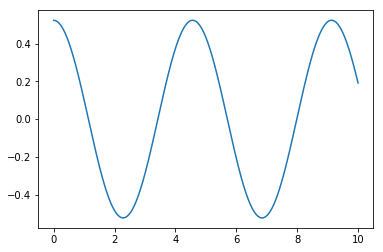

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(pen.times,pen.thetas)

## Using `odeint`
This solution is much more pythonic...

In [5]:
from scipy.integrate import odeint

In [6]:
def pend(y, t, l):
    """Equations of motion
    
    Function to be integrated by odeint.
    The signature of the function to be passed to odeint
    has the form f(y,t,...)
    
    Parameters
    ----------
    y: array_like
        Values of dependent variables, 
        y[0]=theta, y[1]=omega
    t: float
        Not needed, because equation of motions
        do not explictly depend on t
        but required by odeint interface
    l: float
        length of pendulum
        
    Returns
    -------
    dydt: array_like
        Array of derivative of input array
    """
    theta, omega = y
    dydt = [omega, -g/l*np.sin(theta)]
    return dydt

In [7]:
y0 = [np.pi/6, 0]
times = np.linspace(0,10,101)

In [8]:
l = 1.
#args is a tuple of the additinal arguments to the ODE system to integrate, beside 
#the mandatory y and t. In this case l
sol = odeint(pend,y0, times, args=(l,))

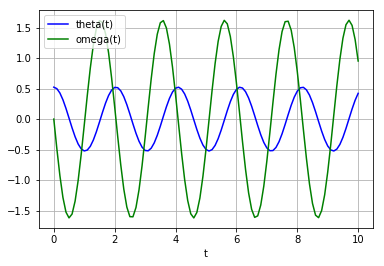

In [9]:
plt.plot(times, sol[:, 0], 'b', label='theta(t)')
plt.plot(times, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Note that with `odeint` we did not have to worry about providing a times array with small enough time intervals.  
If you are interested the `odeint` function uses a [FORTRAN code](http://www.oecd-nea.org/tools/abstract/detail/uscd1227/) to solve the DOE system.